In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

Dataset description: Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

Instructions

Install the necessary packages

Import you data and perform basic data exploration phase

Display general information about the dataset

Create a pandas profiling reports to gain insights into the dataset

Handle Missing and corrupted values

Remove duplicates, if they exist

Handle outliers, if they exist

Encode categorical features

Based on the previous data exploration train and test a machine learning classifier

Create a streamlit application (locally)

Add input fields for your features and a validation button at the end of the form

Import your ML model into the streamlit application and start making predictions given the provided features values

Note:

This checkpoint should be done locally, (Google colab notebooks won't work) Make sure to run the app using the "streamlit run" command in your terminal.



In [4]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cf37aa3245ddbebddd80ffadd0c1001cf9f906a25e513bb3f12d98012e0bcbcc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as ydp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
expresso = pd.read_csv('/content/Expresso_churn_dataset.csv')
expresso.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [7]:
expresso.shape

(2154048, 19)

In [8]:
expresso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(expresso, title="Expresso churn")
profile.to_file('/content/expresso.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7b8077d95c60, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
expresso. isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [11]:
expresso.isna().sum().sum()

14380032

In [12]:
for column in expresso.columns:
    if pd.api.types.is_numeric_dtype(expresso[column]): # Check if the column is numeric
       expresso[column].fillna(expresso[column].mean(),inplace=True)
    else:
        # Handle non-numeric columns (e.g., fill with mode or a constant)
        expresso[column].fillna(expresso[column].mode()[0], inplace=True)

In [13]:
expresso.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [14]:
expresso.duplicated().sum()

0

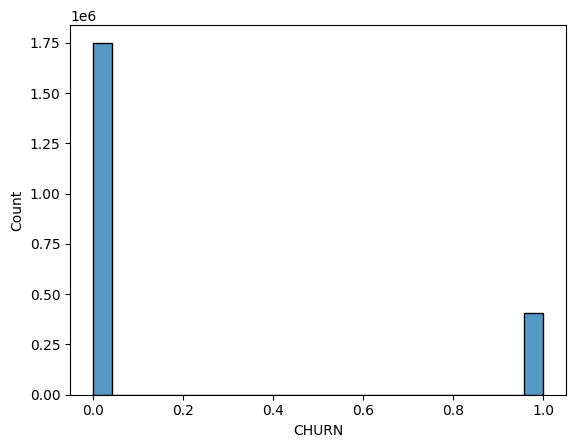

In [15]:
sns.histplot(expresso['CHURN'])
plt.show()

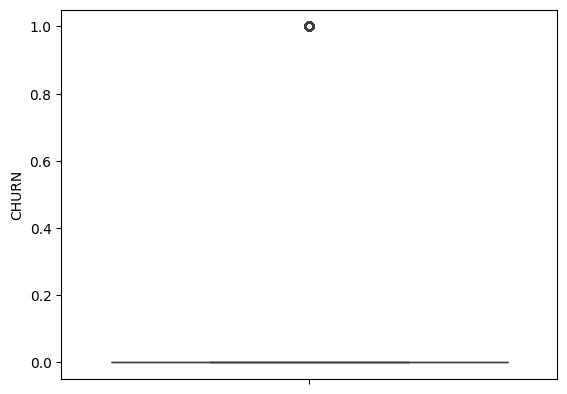

In [16]:
sns.boxplot(expresso['CHURN'])
plt.show()

In [17]:
#Convert categorical data to numerical data using lebel encoding
from sklearn import preprocessing
lebel = preprocessing.LabelEncoder()


In [18]:
expresso_enc = expresso.select_dtypes(include=['object']).columns
for column in expresso_enc: # Convert Categorical Data to Numerical
    expresso[column] = lebel.fit_transform(expresso[column]) # Use lebel instead of Label
expresso.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,2,7,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,0,54,107,8.000000,0
1,1,0,5,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,0,4,18,9.272461,1
2,2,0,7,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,8.170132,7.553309,0,17,108,1.000000,0
3,3,0,7,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,8.170132,7.553309,0,62,35,11.000000,0
4,4,0,7,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,8.170132,7.553309,0,11,100,2.000000,0


In [19]:
#select the target variable and the features
features = ['REGION','TENURE','MONTANT','FREQUENCE_RECH','REVENUE',
       'ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','MRG','REGULARITY','TOP_PACK','FREQ_TOP_PACK',]
x = expresso[features].values
y = expresso['CHURN'].values

In [20]:
#Split Dataset into Training and Test Sets
from sklearn.model_selection import train_test_split # make sure to import this module
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [21]:
model = LogisticRegression() # Instantiate model
model.fit(x_train, y_train) # Fit or train model with train dataset using X_train

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
 #fitting our model
tree = LogisticRegression()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

# evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
print("matrix:{}".format(confusion_matrix(y_test, y_pred)))
print("report:{} ".format(classification_report(y_test, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score:0.8675448573617139
matrix:[[324790  25016]
 [ 32047  48957]]
report:              precision    recall  f1-score   support

           0       0.91      0.93      0.92    349806
           1       0.66      0.60      0.63     81004

    accuracy                           0.87    430810
   macro avg       0.79      0.77      0.78    430810
weighted avg       0.86      0.87      0.87    430810
 


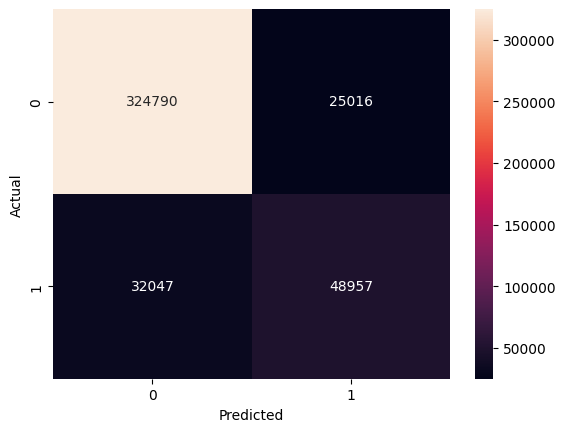

[[324790  25016]
 [ 32047  48957]]


<Figure size 600x400 with 0 Axes>

In [23]:
#Using confusion matrice to visualize the performance of classification algorithm
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.figure(figsize=(6, 4))
print(cm)

In [24]:
#Impute missing values in numerical features using SimpleImputer with 'mean' strategy
#expresso_num_cols = expresso.select_dtypes(include=['int64', 'float64']).columns
#X_num = expresso[expresso_num_cols]
#X_num_imputed = imputer.fit_transform(X_num)
#X_num_imputed = pd.DataFrame(X_num_imputed, columns=expresso_num_cols)



In [25]:
!pip install pypickle

#

In [28]:
import pypickle
filepath = 'expresso.pkl' #save the work as (.pkl) in variable called filepath
pypickle.save(filepath,model) #save the model and the filepath

[pypickle] Pickle file saved: [expresso.pkl]


True